# Advanced Band-Stop Filter Implementation in Python

This notebook provides a comprehensive guide to implementing a band-stop filter in Python. It is ideal for signal processing enthusiasts and professionals.

In [ ]:
# Import necessary libraries

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import numpy as np
import scipy.integrate as integrate
import scipy

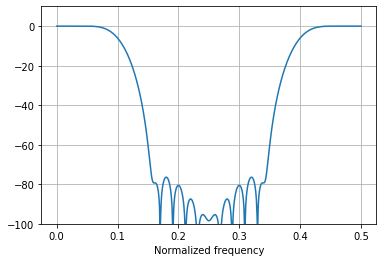

In [ ]:
# create a band-stop filter

fL = 0.1  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
fH = 0.4  # Cutoff frequency as a fraction of the sampling rate (in (0, 0.5)).
b = 0.08  # Transition band, as a fraction of the sampling rate (in (0, 0.5)).
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # Make sure that N is odd.
n = np.arange(N)

# Compute a low-pass filter with cutoff frequency fL.
hlpf = np.sinc(2 * fL * (n - (N - 1) / 2))
hlpf *= np.blackman(N)
hlpf /= np.sum(hlpf)

# Compute a high-pass filter with cutoff frequency fH.
hhpf = np.sinc(2 * fH * (n - (N - 1) / 2))
hhpf *= np.blackman(N)
hhpf /= np.sum(hhpf)
hhpf = -hhpf
hhpf[(N - 1) // 2] += 1

# Add both filters.
h = hlpf + hhpf


# Pad filter with zeros.
L = 1024  # Length of frequency response.
h_padded = np.zeros(L)
h_padded[0 : N] = h

H = np.abs(np.fft.fft(h_padded))[0 : L // 2 + 1]

# Plot frequency response (in dB).
plt.figure()
plt.plot(np.linspace(0, 0.5, len(H)), 20 * np.log10(H))
plt.xlabel('Normalized frequency')
plt.ylabel('')
plt.ylim([-100, 10])
plt.grid()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


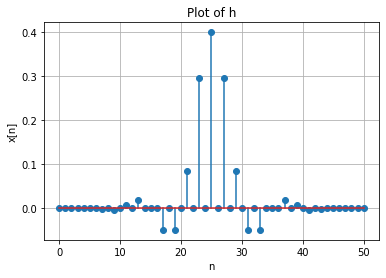

In [ ]:
n = np.arange(51);
dt = 0.07/50
plt.xlabel('n');
plt.ylabel('x[n]');
plt.title(r'Plot of h');
plt.grid()
plt.stem(n, h);

TypeError: ignored

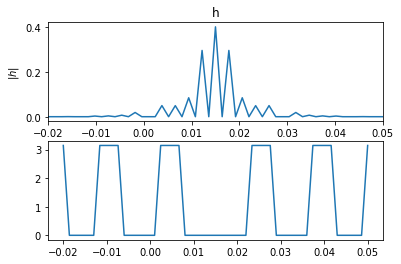

In [ ]:
In [27]: t = np.linspace(-0.02, 0.05, 51)

In [28]: plt.subplot(2,1,1); plt.plot(t, np.abs(h));

In [29]: plt.xlabel(r'$t$');

In [30]: plt.ylabel(r'$|h|$');

In [31]: plt.title(r'h');

In [32]: plt.xlim([-0.02, 0.05]);

In [33]: plt.subplot(2,1,2); plt.plot(t, np.angle(h))*360/(2*np.pi);

In [34]: plt.xlabel('$t$');

In [35]: plt.ylabel(r'$\angle x(t)$');

In [36]: plt.title(r'Phase of  $x(t)=e^{j 100 \pi t}$');

In [37]: plt.xlim([-0.02, 0.05]);

In [38]: plt.show()